# Banana Watering Plan Prediction

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./dataset/watering plan.csv')

In [3]:
df.head()

,pH,organic_matter_content,soil_type,soil_moisture,avg_temperature,avg_rainfall,plant_height,leaf_color,stem_diameter,plant_density,...,temperature,humidity,rainfall,water_source,irrigation_method,fertilizer_used_last_season,crop_rotation,pest_disease_infestation,slope,watering_plan
0,6.2,low,Cinder Soil,25,28,100,50,Green,10,100,...,30,70,200,Rainwater harvesting,Drip,organic,yes,no,medium,every day
1,6.8,moderate,Laterite Soil,40,25,150,75,Green,15,150,...,25,80,250,River,Sprinkler,organic,no,yes,low,once every 2-3 days
2,5.5,high,Yellow Soil,30,30,200,80,Yellow,12,200,...,28,75,300,Municipal supply,Drip,inorganic,yes,yes,none,once every 3-4 days
3,6.5,low,Black Soil,20,26,120,60,Green,8,120,...,26,65,150,Well,Flood,organic,yes,no,high,every day
4,5.8,moderate,Peat Soil,35,28,180,70,Green,14,180,...,27,85,200,Rainwater harvesting,Drip,inorganic,no,yes,low,once every 2-3 days


In [7]:
print(df.columns)

Index(['pH', 'organic_matter_content', 'soil_type', 'soil_moisture',
       'avg_temperature', 'avg_rainfall', 'plant_height', 'leaf_color',
       'stem_diameter', 'plant_density', 'soil_texture', 'soil_color',
       'temperature', 'humidity', 'rainfall', 'water_source',
       'irrigation_method', 'fertilizer_used_last_season', 'crop_rotation',
       'pest_disease_infestation', 'slope', 'watering_plan'],
      dtype='object')
Index(['pH', 'organic_matter_content', 'soil_type', 'soil_moisture',
       'avg_temperature', 'avg_rainfall', 'plant_height', 'leaf_color',
       'stem_diameter', 'plant_density', 'soil_texture', 'soil_color',
       'temperature', 'humidity', 'rainfall', 'water_source',
       'irrigation_method', 'fertilizer_used_last_season', 'crop_rotation',
       'pest_disease_infestation', 'slope', 'fertilizer_type',
       'fertilizer_plan'],
      dtype='object')


- **pH of soil (measured on a scale of 0-14)**: Soil pH can affect the availability of nutrients
to plants. For example, in acidic soils (pH < 6.0), certain nutrients like Phosphorus and
Potassium tend to be less available to plants.
Organic matter content in soil (low, moderate, high): Soils with higher organic matter
content tend to have higher levels of Nitrogen, Phosphorus, and Potassium, which can
contribute to better plant growth and nutrient availability.

- **Soil type ('Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil')**: The
type of soil can affect its water-holding capacity, nutrient-holding capacity, and drainage,
which in turn can influence the watering requirements for plants.

- **Soil moisture (measured as a percentage)**: Soil moisture can affect the availability of
nutrients to plants as well as plant growth and yield. It indicates the amount of water
present in the soil at a given time.

- **Average temperature (measured in Celsius)**: Temperature can affect plant growth and
development as well as the rate of water evaporation from the soil. It is an important
factor to consider when determining the watering schedule.

- **Average rainfall (measured in millimeters per month)**: Rainfall can impact the
watering needs of plants as it contributes to the overall soil moisture content. Higher
rainfall may require less frequent watering, while lower rainfall may necessitate more
frequent watering.

- **Plant height (measured in centimeters)**: Plant height can be an indicator of plant
growth and development. Taller plants may have higher water requirements compared to
shorter ones.

- **Leaf color (Green, Yellow, Brown)**: Leaf color can indicate the overall health and water
status of the plant. Yellow or brown leaves may be a sign of water stress or inadequate
watering.

- **Stem diameter (measured in millimeters)**: Stem diameter can be an indicator of plant
growth and development. Thicker stems may require more water compared to thinner
ones.

- **Plant density (number of plants per unit area)**: Plant density can affect water uptake
and water competition among plants. Higher plant density may require more frequent
watering to ensure all plants receive sufficient water.

- **Soil texture**: Soil texture can give an indication of the water-holding capacity of the soil.
Clayey soils tend to hold water for longer periods compared to sandy soils, influencing
the frequency and amount of watering required.

- **Soil color**: The color of the soil can provide insights into its composition and
water-retention capabilities. Dark-colored soils tend to have higher organic matter
content and better water retention capacity.

- **Temperature (in degrees Celsius)**: Temperature affects evaporation rates and can
impact the rate at which water is lost from the soil. Higher temperatures may lead to
increased evaporation and higher watering needs.

- **Humidity (in percentage)**: Humidity levels in the air can influence the rate of water loss
from the soil and the plant. Lower humidity levels may increase the rate of evaporation
and result in higher watering requirements.

- **Rainfall (in mm)**: Rainfall directly contributes to the soil moisture content and can impact
the watering needs of plants. Higher rainfall may reduce the frequency of additional
watering.

- **Water source ('Well', 'River', 'Canal', 'Rainwater harvesting', 'Municipal supply')**:
The source of water used for irrigation can affect the quality and availability of water for
plants.

- **Irrigation method ('Drip', 'Flood', 'Sprinkler')**: The method of irrigation used can
impact the efficiency of water delivery to the plants and influence the watering schedule.

- **Fertilizer type used in the previous season ('Organic', 'Inorganic', 'both')**: The type
of fertilizer used in the previous season can affect soil nutrient availability and may
impact the watering requirements for the current season.

- **Crop rotation ('Yes', 'No')**: Crop rotation can help to prevent nutrient depletion and
reduce pest and disease incidence, which may indirectly impact the watering needs of
plants.

- **Pest and disease infestation ('Yes', 'No')**: Pest and disease infestation can affect plant
growth, yield, and water requirements. Infested plants may require additional watering to
cope with stress.

- **Slope of the land ('None', 'Low', 'Medium', 'High')**: The slope of the land can affect
water drainage and runoff, which can influence the watering requirements for plants.

##### Target Variables
- **watering_plan**: The recommended watering schedule for the banana plants.

    **Possible values**:
    - "every day": Water the plants every day.
    - "once every 2-3 days": Water the plants once every 2 to 3 days.
    - "once every 3-4 days": Water the plants once every 3 to 4 days.
    - "none": No specific watering plan is required.

In [632]:
df.columns

Index(['pH', 'organic_matter_content', 'soil_type', 'soil_moisture',
       'avg_temperature', 'avg_rainfall', 'plant_height', 'leaf_color',
       'stem_diameter', 'plant_density', 'soil_texture', 'soil_color',
       'temperature', 'humidity', 'rainfall', 'water_source',
       'irrigation_method', 'fertilizer_used_last_season', 'crop_rotation',
       'pest_disease_infestation', 'slope', 'watering_plan'],
      dtype='object')

In [633]:
df.describe()

,pH,soil_moisture,avg_temperature,avg_rainfall,plant_height,stem_diameter,plant_density,temperature,humidity,rainfall
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000
mean,6.117500,29.850000,27.125000,142.000000,59.725000,10.225000,129.25000,25.975000,73.750000,195.750000
std,0.461818,6.277963,1.539022,31.231148,12.882084,2.930717,37.02996,1.671595,8.825226,36.506936
min,5.300000,20.000000,25.000000,100.000000,38.000000,6.000000,70.00000,23.000000,60.000000,140.000000
25%,5.700000,24.000000,26.000000,110.000000,49.500000,8.000000,100.00000,25.000000,65.000000,160.000000
50%,6.150000,30.000000,27.000000,145.000000,62.000000,10.000000,120.00000,26.000000,75.000000,200.000000
75%,6.500000,35.250000,28.000000,162.500000,70.000000,13.000000,160.00000,27.000000,80.000000,220.000000
max,6.900000,40.000000,30.000000,200.000000,80.000000,15.000000,200.00000,30.000000,90.000000,300.000000


In [634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pH                           40 non-null     float64
 1   organic_matter_content       40 non-null     object 
 2   soil_type                    40 non-null     object 
 3   soil_moisture                40 non-null     int64  
 4   avg_temperature              40 non-null     int64  
 5   avg_rainfall                 40 non-null     int64  
 6   plant_height                 40 non-null     int64  
 7   leaf_color                   40 non-null     object 
 8   stem_diameter                40 non-null     int64  
 9   plant_density                40 non-null     int64  
 10  soil_texture                 40 non-null     object 
 11  soil_color                   40 non-null     object 
 12  temperature                  40 non-null     int64  
 13  humidity              

# EDA(Exploratory Data Analysis)

##### Categorical variables

In [635]:
df.head()

,pH,organic_matter_content,soil_type,soil_moisture,avg_temperature,avg_rainfall,plant_height,leaf_color,stem_diameter,plant_density,...,temperature,humidity,rainfall,water_source,irrigation_method,fertilizer_used_last_season,crop_rotation,pest_disease_infestation,slope,watering_plan
0,6.2,low,Cinder Soil,25,28,100,50,Green,10,100,...,30,70,200,Rainwater harvesting,Drip,organic,yes,no,medium,every day
1,6.8,moderate,Laterite Soil,40,25,150,75,Green,15,150,...,25,80,250,River,Sprinkler,organic,no,yes,low,once every 2-3 days
2,5.5,high,Yellow Soil,30,30,200,80,Yellow,12,200,...,28,75,300,Municipal supply,Drip,inorganic,yes,yes,none,once every 3-4 days
3,6.5,low,Black Soil,20,26,120,60,Green,8,120,...,26,65,150,Well,Flood,organic,yes,no,high,every day
4,5.8,moderate,Peat Soil,35,28,180,70,Green,14,180,...,27,85,200,Rainwater harvesting,Drip,inorganic,no,yes,low,once every 2-3 days


In [636]:
df.columns

Index(['pH', 'organic_matter_content', 'soil_type', 'soil_moisture',
       'avg_temperature', 'avg_rainfall', 'plant_height', 'leaf_color',
       'stem_diameter', 'plant_density', 'soil_texture', 'soil_color',
       'temperature', 'humidity', 'rainfall', 'water_source',
       'irrigation_method', 'fertilizer_used_last_season', 'crop_rotation',
       'pest_disease_infestation', 'slope', 'watering_plan'],
      dtype='object')

In [637]:
print(f'organic_matter_content: {df.organic_matter_content.unique()}')
print(f'soil_type: {df.soil_type.unique()}')
print(f'leaf_color: {df.leaf_color.unique()}')
print(f'soil_texture: {df.soil_texture.unique()}')
print(f'soil_color: {df.soil_color.unique()}')
print(f'water_source: {df.water_source.unique()}')
print(f'irrigation_method: {df.irrigation_method.unique()}')
print(f'fertilizer_used_last_season: {df.fertilizer_used_last_season.unique()}')
print(f'crop_rotation: {df.crop_rotation.unique()}')
print(f'pest_disease_infestation: {df.pest_disease_infestation.unique()}')
print(f'slope: {df.slope.unique()}')
print(f'watering_plan: {df.watering_plan.unique()}')

organic_matter_content: ['low' 'moderate' 'high']
soil_type: ['Cinder Soil' 'Laterite Soil' 'Yellow Soil' 'Black Soil' 'Peat Soil']
leaf_color: ['Green' 'Yellow']
soil_texture: ['Loamy' 'Clayey' 'Sandy']
soil_color: ['Red' 'Brown' 'Yellow' 'Dark' 'Black']
water_source: ['Rainwater harvesting' 'River' 'Municipal supply' 'Well' 'Canal']
irrigation_method: ['Drip' 'Sprinkler' 'Flood']
fertilizer_used_last_season: ['organic' 'inorganic']
crop_rotation: ['yes' 'no']
pest_disease_infestation: ['no' 'yes']
slope: ['medium' 'low' 'none' 'high']
watering_plan: ['every day' 'once every 2-3 days' 'once every 3-4 days']


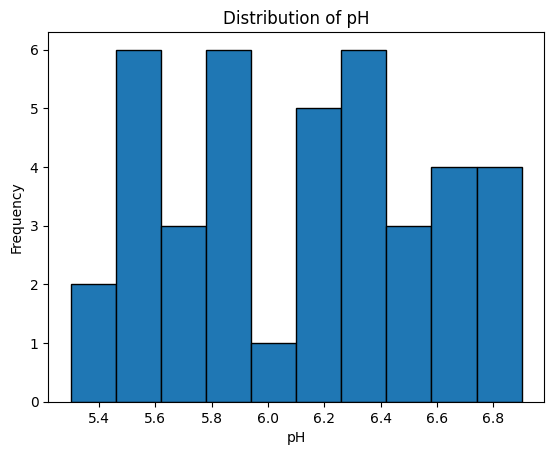

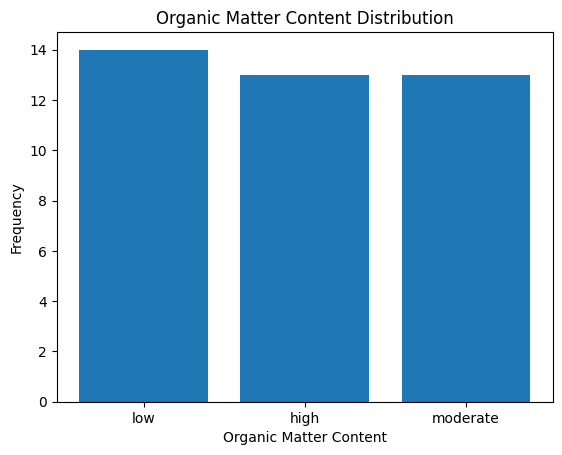

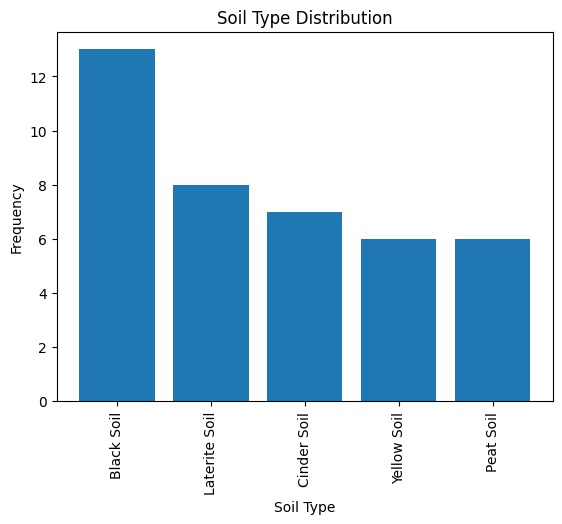

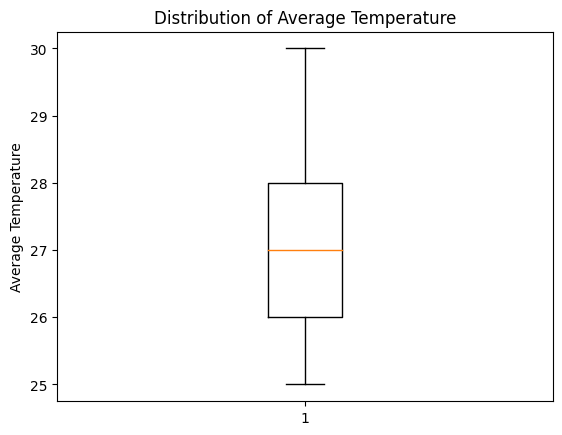

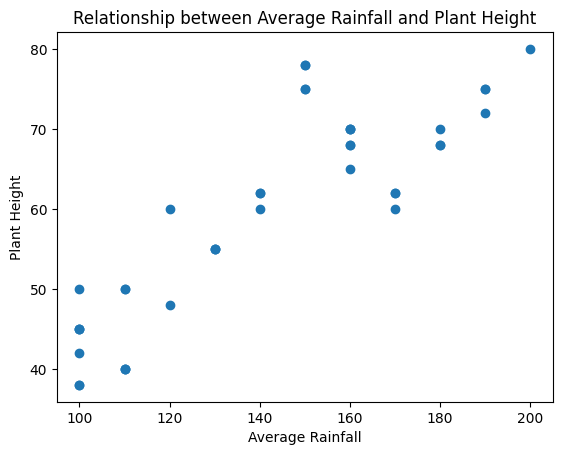

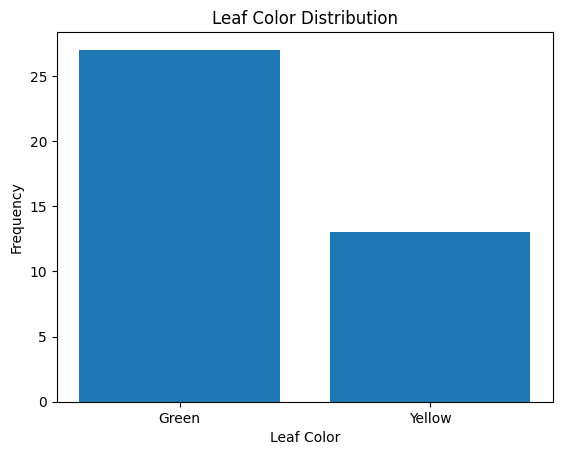

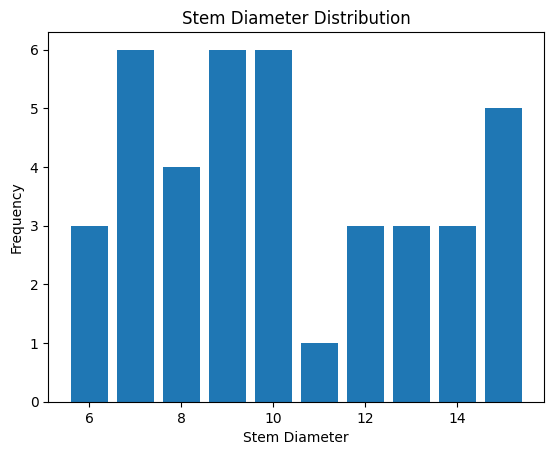

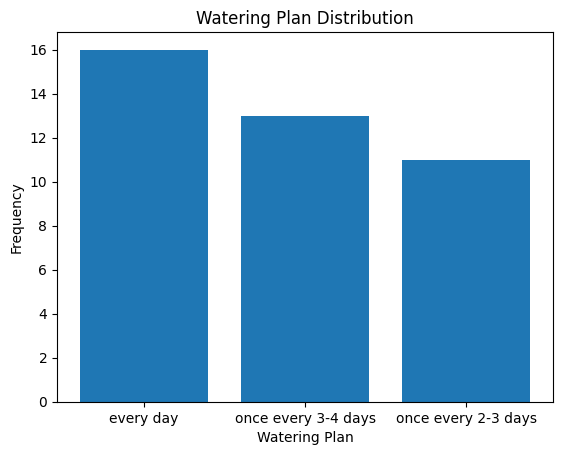

In [638]:
import matplotlib.pyplot as plt

# Histogram of pH
plt.hist(df['pH'], bins=10, edgecolor='black')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('Distribution of pH')
plt.show()

# Bar chart of organic matter content
organic_counts = df['organic_matter_content'].value_counts()
plt.bar(organic_counts.index, organic_counts.values)
plt.xlabel('Organic Matter Content')
plt.ylabel('Frequency')
plt.title('Organic Matter Content Distribution')
plt.show()

# Bar chart of soil type
soil_type_counts = df['soil_type'].value_counts()
plt.bar(soil_type_counts.index, soil_type_counts.values)
plt.xlabel('Soil Type')
plt.ylabel('Frequency')
plt.title('Soil Type Distribution')
plt.xticks(rotation='vertical')
plt.show()

# Box plot of average temperature
plt.boxplot(df['avg_temperature'])
plt.ylabel('Average Temperature')
plt.title('Distribution of Average Temperature')
plt.show()

# Scatter plot of average rainfall and plant height
plt.scatter(df['avg_rainfall'], df['plant_height'])
plt.xlabel('Average Rainfall')
plt.ylabel('Plant Height')
plt.title('Relationship between Average Rainfall and Plant Height')
plt.show()

# Bar chart of leaf color
leaf_color_counts = df['leaf_color'].value_counts()
plt.bar(leaf_color_counts.index, leaf_color_counts.values)
plt.xlabel('Leaf Color')
plt.ylabel('Frequency')
plt.title('Leaf Color Distribution')
plt.show()

# Bar chart of stem diameter
stem_diameter_counts = df['stem_diameter'].value_counts()
plt.bar(stem_diameter_counts.index, stem_diameter_counts.values)
plt.xlabel('Stem Diameter')
plt.ylabel('Frequency')
plt.title('Stem Diameter Distribution')
plt.show()

# Bar chart of watering plan
watering_plan_counts = df['watering_plan'].value_counts()
plt.bar(watering_plan_counts.index, watering_plan_counts.values)
plt.xlabel('Watering Plan')
plt.ylabel('Frequency')
plt.title('Watering Plan Distribution')
plt.show()

##### Relationship between rainfall, plant height and watering plan

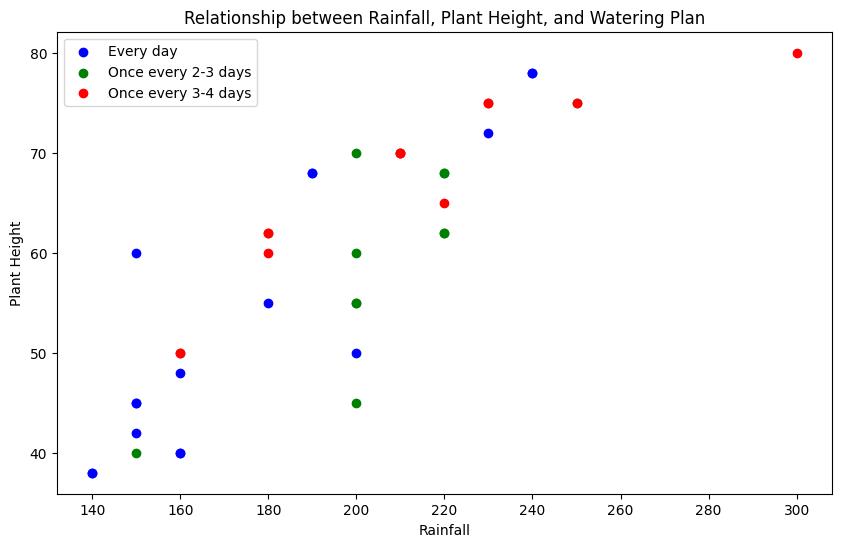

In [639]:
# Scatter plot of rainfall, plant height, and watering plan
plt.figure(figsize=(10, 6))

# Plotting watering plan "every day"
plt.scatter(df[df['watering_plan'] == 'every day']['rainfall'],
            df[df['watering_plan'] == 'every day']['plant_height'],
            label='Every day', color='blue')

# Plotting watering plan "once every 2-3 days"
plt.scatter(df[df['watering_plan'] == 'once every 2-3 days']['rainfall'],
            df[df['watering_plan'] == 'once every 2-3 days']['plant_height'],
            label='Once every 2-3 days', color='green')

# Plotting watering plan "once every 3-4 days"
plt.scatter(df[df['watering_plan'] == 'once every 3-4 days']['rainfall'],
            df[df['watering_plan'] == 'once every 3-4 days']['plant_height'],
            label='Once every 3-4 days', color='red')

# Title and labels
plt.title('Relationship between Rainfall, Plant Height, and Watering Plan')
plt.xlabel('Rainfall')
plt.ylabel('Plant Height')

# Legend
plt.legend()

# Display the plot
plt.show()

##### Scatter plot of 'pH' and 'organic_matter_content'

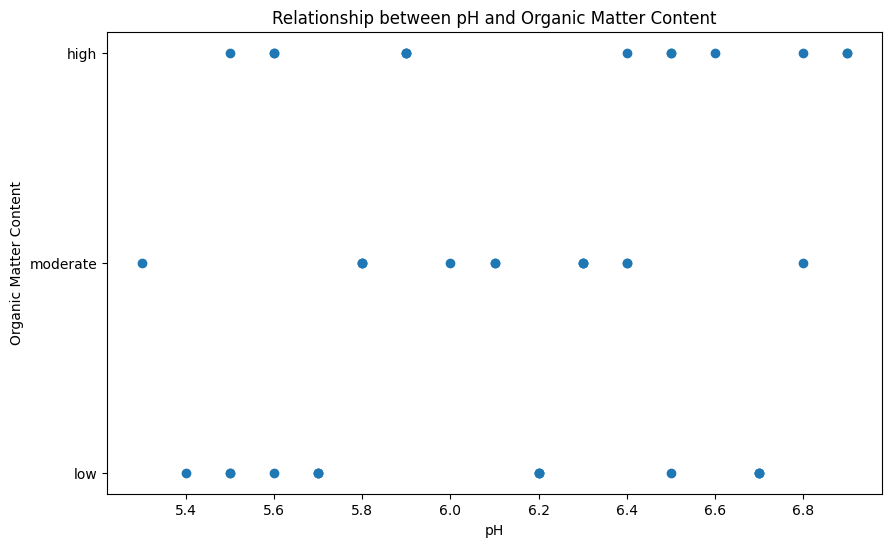

In [640]:
plt.figure(figsize=(10, 6))
plt.scatter(df['pH'], df['organic_matter_content'])
plt.title('Relationship between pH and Organic Matter Content')
plt.xlabel('pH')
plt.ylabel('Organic Matter Content')
plt.show()

##### Scatter plot of 'soil_moisture' and 'avg_temperature'

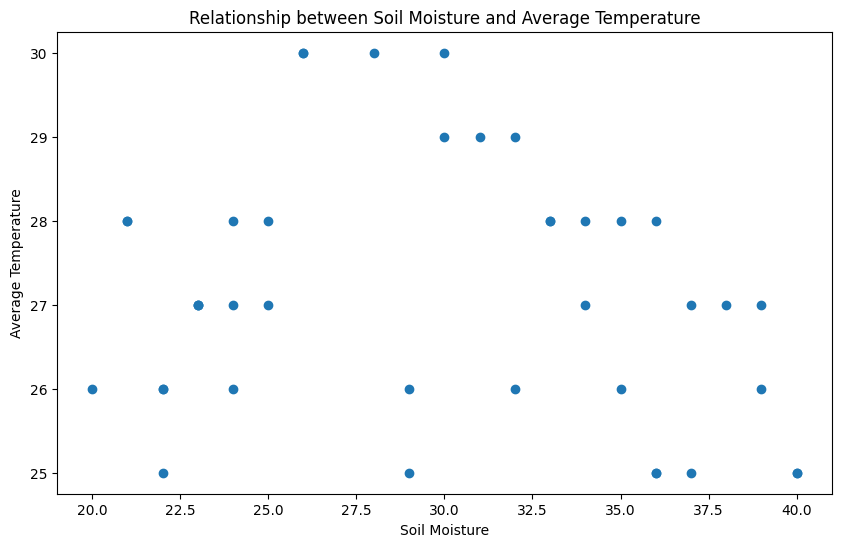

In [641]:
plt.figure(figsize=(10, 6))
plt.scatter(df['soil_moisture'], df['avg_temperature'])
plt.title('Relationship between Soil Moisture and Average Temperature')
plt.xlabel('Soil Moisture')
plt.ylabel('Average Temperature')
plt.show()

##### Scatter plot of 'plant_height', 'avg_rainfall', and 'watering_plan'

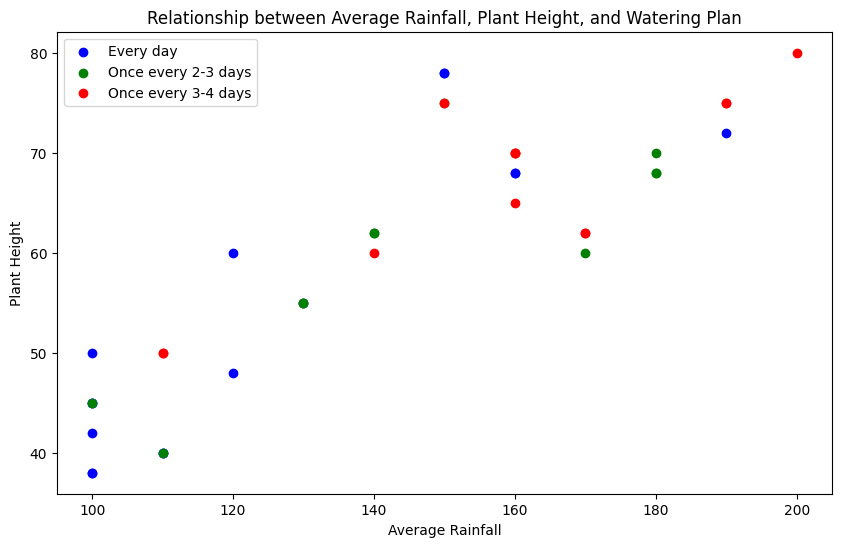

In [642]:
plt.figure(figsize=(10, 6))

# Plotting watering plan "every day"
plt.scatter(df[df['watering_plan'] == 'every day']['avg_rainfall'],
            df[df['watering_plan'] == 'every day']['plant_height'],
            label='Every day', color='blue')

# Plotting watering plan "once every 2-3 days"
plt.scatter(df[df['watering_plan'] == 'once every 2-3 days']['avg_rainfall'],
            df[df['watering_plan'] == 'once every 2-3 days']['plant_height'],
            label='Once every 2-3 days', color='green')

# Plotting watering plan "once every 3-4 days"
plt.scatter(df[df['watering_plan'] == 'once every 3-4 days']['avg_rainfall'],
            df[df['watering_plan'] == 'once every 3-4 days']['plant_height'],
            label='Once every 3-4 days', color='red')

plt.title('Relationship between Average Rainfall, Plant Height, and Watering Plan')
plt.xlabel('Average Rainfall')
plt.ylabel('Plant Height')
plt.legend()
plt.show()

##### Scatter plot of 'leaf_color' and 'stem_diameter':

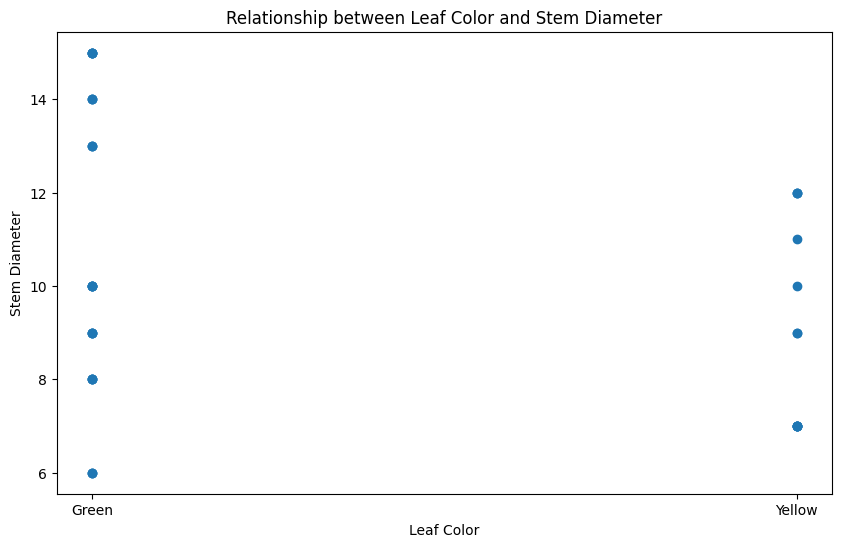

In [643]:
plt.figure(figsize=(10, 6))
plt.scatter(df['leaf_color'], df['stem_diameter'])
plt.title('Relationship between Leaf Color and Stem Diameter')
plt.xlabel('Leaf Color')
plt.ylabel('Stem Diameter')
plt.show()

##### Scatter plot of 'crop_rotation', 'humidity', and 'plant_density'

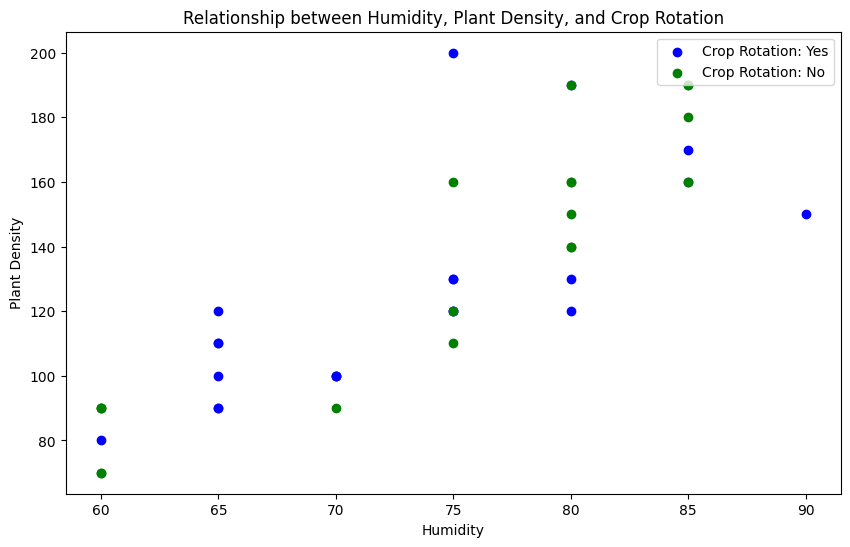

In [644]:
plt.figure(figsize=(10, 6))

# Plotting crop rotation "yes"
plt.scatter(df[df['crop_rotation'] == 'yes']['humidity'],
            df[df['crop_rotation'] == 'yes']['plant_density'],
            label='Crop Rotation: Yes', color='blue')

# Plotting crop rotation "no"
plt.scatter(df[df['crop_rotation'] == 'no']['humidity'],
            df[df['crop_rotation'] == 'no']['plant_density'],
            label='Crop Rotation: No', color='green')

plt.title('Relationship between Humidity, Plant Density, and Crop Rotation')
plt.xlabel('Humidity')
plt.ylabel('Plant Density')
plt.legend()
plt.show()

# Encoding

In [645]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pickle

def encode_categorical_features(df, one_hot_cols, ordinal_cols, target_column):
    # One-hot encode categorical columns
    one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
    one_hot_encoded_data = one_hot_encoder.fit_transform(df[one_hot_cols])

    # Save the encoder object using pickle
    one_hot_encoder_filename = 'one_hot_encoder.pkl'
    with open(one_hot_encoder_filename, 'wb') as f:
        pickle.dump(one_hot_encoder, f)

    # Ordinal encode categorical columns
    ordinal_encoder = OrdinalEncoder()
    ordinal_encoded_data = ordinal_encoder.fit_transform(df[ordinal_cols])

    # Save the encoder object using pickle
    ordinal_encoder_filename = 'ordinal_encoder.pkl'
    with open(ordinal_encoder_filename, 'wb') as f:
        pickle.dump(ordinal_encoder, f)

    # Target variable
    ordinal_encoder_target_var = OrdinalEncoder()
    ordinal_encoder_target_var_data = ordinal_encoder_target_var.fit_transform(df[target_column])

    # Save the encoder object using pickle
    ordinal_encoder_target_var_filename = 'ordinal_encoder_target_var.pkl'
    with open(ordinal_encoder_target_var_filename, 'wb') as f:
       pickle.dump(ordinal_encoder_target_var, f)

    return one_hot_encoded_data, ordinal_encoded_data, ordinal_encoder_target_var_data

In [646]:
print(f'organic_matter_content: {df.organic_matter_content.unique()}')
print(f'soil_type: {df.soil_type.unique()}')
print(f'leaf_color: {df.leaf_color.unique()}')
print(f'soil_texture: {df.soil_texture.unique()}')
print(f'soil_color: {df.soil_color.unique()}')
print(f'water_source: {df.water_source.unique()}')
print(f'irrigation_method: {df.irrigation_method.unique()}')
print(f'fertilizer_used_last_season: {df.fertilizer_used_last_season.unique()}')
print(f'crop_rotation: {df.crop_rotation.unique()}')
print(f'pest_disease_infestation: {df.pest_disease_infestation.unique()}')
print(f'slope: {df.slope.unique()}')
print(f'watering_plan: {df.watering_plan.unique()}')

organic_matter_content: ['low' 'moderate' 'high']
soil_type: ['Cinder Soil' 'Laterite Soil' 'Yellow Soil' 'Black Soil' 'Peat Soil']
leaf_color: ['Green' 'Yellow']
soil_texture: ['Loamy' 'Clayey' 'Sandy']
soil_color: ['Red' 'Brown' 'Yellow' 'Dark' 'Black']
water_source: ['Rainwater harvesting' 'River' 'Municipal supply' 'Well' 'Canal']
irrigation_method: ['Drip' 'Sprinkler' 'Flood']
fertilizer_used_last_season: ['organic' 'inorganic']
crop_rotation: ['yes' 'no']
pest_disease_infestation: ['no' 'yes']
slope: ['medium' 'low' 'none' 'high']
watering_plan: ['every day' 'once every 2-3 days' 'once every 3-4 days']


In [647]:
# Ordinal columns (ones that have an order)
ordinal_columns = ['organic_matter_content', 'slope']
# Categorical columns (ones without order, already encoded)
categorical_columns = ['soil_type', 'leaf_color', 'soil_texture',
                       'soil_color', 'water_source', 'irrigation_method',
                       'fertilizer_used_last_season', 'crop_rotation',
                       'pest_disease_infestation']

# Non-categorical columns
non_categorical_columns = ['pH', 'soil_moisture', 'avg_temperature', 'avg_rainfall',
                           'plant_height', 'stem_diameter', 'plant_density',
                           'temperature', 'humidity', 'rainfall']
target_column = ['watering_plan']

In [648]:
# encoding data
one_hot_encoded_data, ordinal_encoded_data, ordinal_encoded_target_data = encode_categorical_features(df, categorical_columns, ordinal_columns, target_column)

In [649]:
# get numerical data columns into a ndarray
numerical_columns = df[non_categorical_columns].values

In [650]:
import numpy as np

# create independant variables
x = np.hstack([
    one_hot_encoded_data,
    ordinal_encoded_data,
    numerical_columns
])
y = ordinal_encoded_target_data

In [651]:
##### shapes
print('OHE shape: ',one_hot_encoded_data.shape, '\nOE shape: ', ordinal_encoded_data.shape)
print('x shape:', x.shape)
print('y shape: ', y.shape)

OHE shape:  (40, 20) 
OE shape:  (40, 2)
x shape: (40, 32)
y shape:  (40, 1)


# Scaling

In [652]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

with open('watering_plan_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Train Test Split

In [653]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Building
> `OneVsRestClassifier` approach, which trains multiple binary classifiers, one for each class, and then combines their predictions.

In [654]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

> The roc_curve function does not support multiclass classification directly.
>
> However, can adapt the code to compute the **ROC curve** and **AUC score** for
> each class separately using the **One-vs-Rest (OvR)** strategy.

In [655]:
# Convert the target variable to binary form
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

### Random Forest Classifier

In [656]:
rf = OneVsRestClassifier(RandomForestClassifier())
rf.fit(x_train, y_train)
rf_probs = rf.predict_proba(x_test)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test_bin.ravel(), rf_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

## Linear Regression

In [657]:
lr = OneVsRestClassifier(LogisticRegression(max_iter=1000))
lr.fit(x_train, y_train)
lr_probs = lr.predict_proba(x_test)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test_bin.ravel(), lr_probs.ravel())
lr_auc = auc(lr_fpr, lr_tpr)

## Gradient Boosting Classifier

In [658]:
gb = OneVsRestClassifier(GradientBoostingClassifier())
gb.fit(x_train, y_train)
gb_probs = gb.predict_proba(x_test)
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test_bin.ravel(), gb_probs.ravel())
gb_auc = auc(gb_fpr, gb_tpr)

## XGBoost Classifier

In [659]:
xgb = OneVsRestClassifier(XGBClassifier())
xgb.fit(x_train, y_train)
xgb_probs = xgb.predict_proba(x_test)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test_bin.ravel(), xgb_probs.ravel())
xgb_auc = auc(xgb_fpr, xgb_tpr)

## LightGBM Classifier

In [660]:
lgb = OneVsRestClassifier(LGBMClassifier())
lgb.fit(x_train, y_train)
lgb_probs = lgb.predict_proba(x_test)
lgb_fpr, lgb_tpr, lgb_thresholds = roc_curve(y_test_bin.ravel(), lgb_probs.ravel())
lgb_auc = auc(lgb_fpr, lgb_tpr)

# Plotting ROC curves

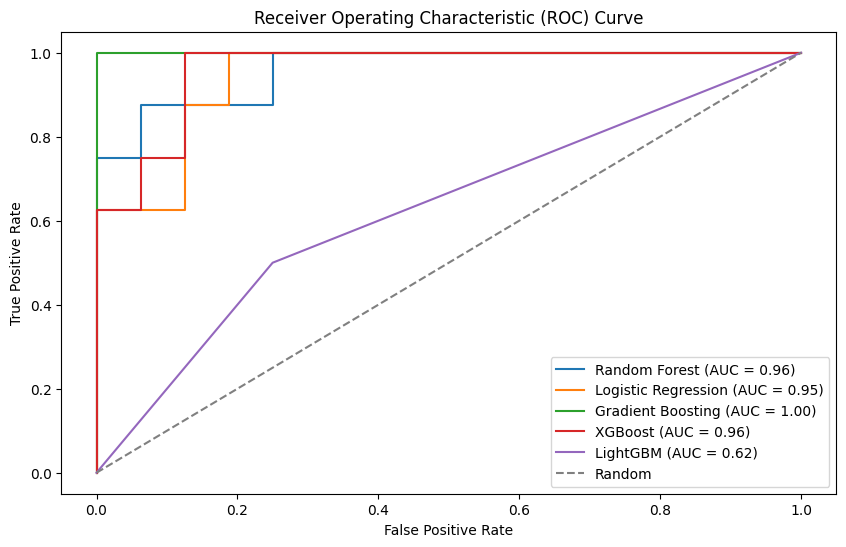

In [661]:
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(lgb_fpr, lgb_tpr, label=f'LightGBM (AUC = {lgb_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

> Seems the  `RandomForest`, `LR`, `GB`, `XGBoost` and `DecisionTree` performs well

# Training

In [662]:
rf = OneVsRestClassifier(GradientBoostingClassifier())
rf.fit(x, y)

# Save the model to a file
with open('water_plan_Gradientboost_classifier.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Testing

In [708]:
import pickle
import numpy as np

def predict(data, model_file='water_plan_gradientboost_classifier.pkl', ordinal_encoder_file='ordinal_encoder.pkl', one_hot_encoder_file='one_hot_encoder.pkl', scaler_file="watering_plan_scaler.pkl", ordinal_encoded_target_file='ordinal_encoder_target_var.pkl'):
    # Ordinal columns (ones that have an order)
    ordinal_columns = ['organic_matter_content', 'slope']
    # Categorical columns (ones without order, already encoded)
    categorical_columns = ['soil_type', 'leaf_color', 'soil_texture',
                           'soil_color', 'water_source', 'irrigation_method',
                           'fertilizer_used_last_season', 'crop_rotation',
                           'pest_disease_infestation']

    # Non-categorical columns
    non_categorical_columns = ['pH', 'soil_moisture', 'avg_temperature', 'avg_rainfall',
                               'plant_height', 'stem_diameter', 'plant_density',
                               'temperature', 'humidity', 'rainfall']

    df = pd.DataFrame.from_dict([data])

    # Load the one-hot encoder
    with open(one_hot_encoder_file, 'rb') as f:
        one_hot_encoder = pickle.load(f)

    # Load the ordinal encoder
    with open(ordinal_encoder_file, 'rb') as f:
        ordinal_encoder = pickle.load(f)

    one_hot_encoded_data = one_hot_encoder.transform(df[categorical_columns])
    ordinal_encoded_data = ordinal_encoder.transform(df[ordinal_columns])

    # Get numerical data columns into a ndarray
    numerical_columns = df[non_categorical_columns].values

    # Create independent variables
    x = np.hstack([
        one_hot_encoded_data,
        ordinal_encoded_data,
        numerical_columns
    ])

    # Load the scaler
    with open(scaler_file, 'rb') as f:
        scaler = pickle.load(f)

    x = scaler.transform(x)

    # Load the model from the file
    with open(model_file, 'rb') as f:
        model = pickle.load(f)

    # Perform inference
    predictions = model.predict(x)
    probabilities = model.predict_proba(x)

    # Reverse transform the predicted labels
    with open(ordinal_encoded_target_file, 'rb') as f:
        ordinal_encoder_target = pickle.load(f)

    # conert [[9.97596309e-01 1.23045918e-05 2.39138657e-03]] to [[0 1 2]]
    class_indexes = np.arange(probabilities.shape[1]).reshape(1, -1)
    # to [[0] [1] [2]]
    formatted_class_indexes = np.transpose(class_indexes)

    class_names = ordinal_encoder_target.inverse_transform(formatted_class_indexes).flatten()

    # Create a dictionary of class names and probabilities
    result = {}
    for class_name, probability in zip(class_names, probabilities[0]):
        result[class_name] = format(probability, '.5f')

    top_prediction = ordinal_encoder_target.inverse_transform(predictions.reshape(1, -1)).flatten()[0]

    return top_prediction, result



sample_data = {
    'pH': 6.2,
    'organic_matter_content': 'low',
    'soil_type': 'Cinder Soil',
    'soil_moisture': '25',
    'avg_temperature': 28,
    'avg_rainfall': 100,
    'plant_height': 50,
    'leaf_color': 'Green',
    'stem_diameter': 3,
    'plant_density': 3,
    'soil_texture': 'Clayey',
    'soil_color': 'Red',
    'temperature': 30,
    'humidity': 20,
    'rainfall': 100,
    'water_source': 'River',
    'irrigation_method': 'Drip',
    'fertilizer_used_last_season': 'organic',
    'crop_rotation': 'yes',
    'pest_disease_infestation': 'no',
    'slope': 'low'
}

predict(sample_data)

('every day',
 {'every day': '0.99760',
  'once every 2-3 days': '0.00001',
  'once every 3-4 days': '0.00239'})